## Importing Libraries

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [10]:
import book_format
book_format.set_style()
import kf_book.gh_internal as gh
import kf_book.book_plots as book_plots
from kf_book.book_plots import plot_errorbars

## Functions for Data Preprocessing

In [11]:
def loader():
    # Load the measured value into this.
    weights1 = np.loadtxt("method1music.txt", delimiter=",")
    weights = list(weights1)
    
    # Load the actual data into this
    actual1 = np.loadtxt("true_vals.txt", delimiter=",")
    actual = list(actual1)
    
    # Output the measured values as a list of N-D coordinates.
    return [weights, actual]

In [12]:
def initialize(weights):
    # Pre-process and calculate the intial values into this variable
    weight = 0
    gain_rate = 0
    
    # Output the initial estimates where
    # weight is a N-D coordinate and gain_rate is a N-D gradient.
    return [weight, gain_rate]

## Data Loading

In [13]:
# This is the measured data got from sensors
# This is the actual data being given as annotations or label for prediction accuracy check
# Size of Actual Data = 1 + Size of Measured Data (according to convention here)

# weights = loader() # loading the data
[weights, actual] = loader()

In [14]:
print(len(weights))
print(len(actual))

1145
1145


In [15]:
weights = weights[1:]
print(len(weights))
print(len(actual))

1144
1145


## Basic g-h Filter

In [16]:
# Intial Hypothesis made by some pre-processing of the measurement data
weight = 125  # initial position
gain_rate = 1.0  # initial gain

# weight, gain_rate = initialize(weights) # initializing the filter output

In [17]:
# Time Step on which data is being measured with respect to the the time step on which initial
# gain is being assumed.
time_step = 1.0  # day

# The estimated value is kept something in between the predicted value and the measured value.
# scale = 0.5 means equal likelihood to both measurement and prediction.
# scale > 0.5 means measurement is given more likelihood of being true.
# scale < 0.5 means prediction is given more likelihood of being true.
weight_scale = 4.0/100

# The gain value is updated to something in between the initial value and the new value indicated by the
# next measurement and previous estimates.
# scale = 0.5 means equal likelihood to both new indicated value and initial value.
# scale > 0.5 means new indicated value is given more likelihood of being true.
# scale < 0.5 means initial value is given more likelihood of being true.
gain_scale = 1.0/30

In [18]:
def gh_filter(weights, weight, gain_rate, weight_scale, gain_scale, do_print=False):
    estimates, predictions = [weight], []
    
    for z in weights:
        # prediction step
        weight = weight + gain_rate * time_step
        predictions.append(weight)
        predicted_weight = weight

        # update step
        residual = z - weight
        gain_rate = gain_rate + gain_scale * (residual/time_step)
        weight = weight + weight_scale * residual
        estimates.append(weight)
        estimated_weight = weight
        
        # Optional Printing Step
        if do_print:
            gh.print_results(estimates, predicted_weight, estimated_weight)
    
    return [estimates, predictions]

In [19]:
estimates, predictions = gh_filter(weights, weight, gain_rate, weight_scale, gain_scale, do_print=False)

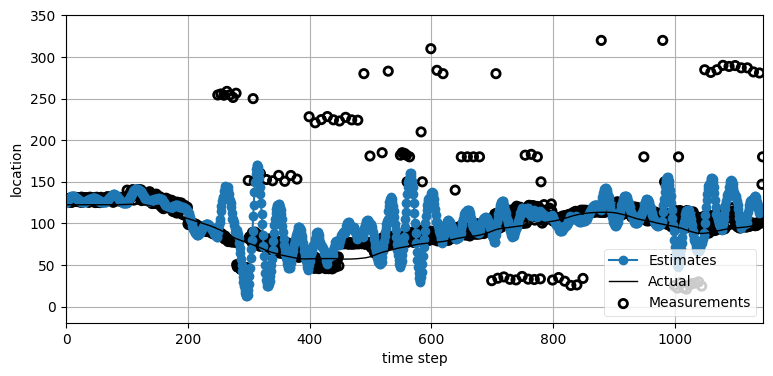

In [20]:
gh.plot_gh_results_manual2(weights, estimates, predictions, actual)

In [21]:
# Intial Hypothesis made by some pre-processing of the measurement data
weight = 175  # initial position
gain_rate = 5.0  # initial gain

# weight, gain_rate = initialize(weights) # initializing the filter output

In [22]:
estimates, predictions = gh_filter(weights, weight, gain_rate, weight_scale, gain_scale, do_print=False)

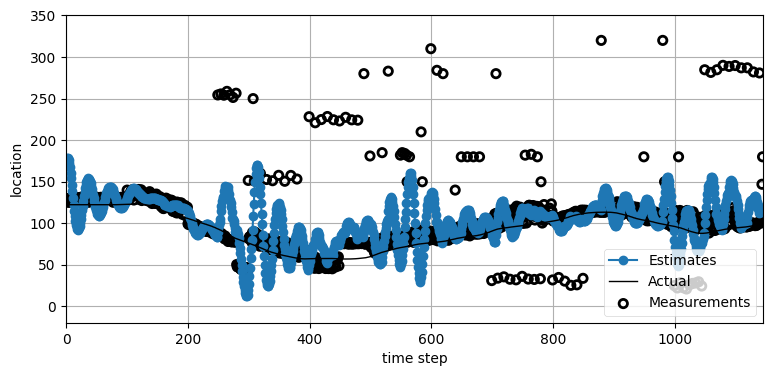

In [23]:
gh.plot_gh_results_manual2(weights, estimates, predictions, actual)

## Developments

## Idea 1 - Outlier Detection using Running Average

In [24]:
# Intial Hypothesis made by some pre-processing of the measurement data
weight = 125  # initial position
gain_rate = 1.0  # initial gain

# weight, gain_rate = initialize(weights) # initializing the filter output

In [25]:
# Time Step on which data is being measured with respect to the the time step on which initial
# gain is being assumed.
time_step = 1.0  # day

# The estimated value is kept something in between the predicted value and the measured value.
# scale = 0.5 means equal likelihood to both measurement and prediction.
# scale > 0.5 means measurement is given more likelihood of being true.
# scale < 0.5 means prediction is given more likelihood of being true.
weight_scale1 = 4.0/100
weight_scale2 = 4.0/1000

# The gain value is updated to something in between the initial value and the new value indicated by the
# next measurement and previous estimates.
# scale = 0.5 means equal likelihood to both new indicated value and initial value.
# scale > 0.5 means new indicated value is given more likelihood of being true.
# scale < 0.5 means initial value is given more likelihood of being true.
gain_scale1 = 1.0/30
gain_scale2 = 1.0/300

In [26]:
def gh_filter_developed(weights, weight, gain_rate, weight_scale1, weight_scale2, gain_scale1, gain_scale2, do_print=False):
    estimates, predictions = [weight], []
    ctr = 1
    running_average = 0.5
    flag = 0
    
    for z in weights:
        # outlier check step
        change = z - weight
        if abs(change) > 50*abs(running_average):
            flag = 1
        else:
            flag = 0
        if flag == 1:
            change = change / 50
        ctr = ctr + 1
        running_average = (running_average*(ctr-1) + change)/ctr
#         print(running_average)
        
        # prediction step
        weight = weight + gain_rate * time_step
        predictions.append(weight)
        predicted_weight = weight

        # update step
        residual = z - weight
        if flag == 0:
            gain_rate = gain_rate + gain_scale1 * (residual/time_step)
        else:
            gain_rate = gain_rate + gain_scale2 * (residual/time_step)
        if flag == 0:
            weight = weight + weight_scale1 * residual
        else:
            weight = weight + weight_scale2 * residual
        estimates.append(weight)
        estimated_weight = weight
        
        # Optional Printing Step
        if do_print:
            gh.print_results(estimates, predicted_weight, estimated_weight)
    
    return [estimates, predictions]

In [27]:
estimates, predictions = gh_filter_developed(weights, weight, gain_rate, weight_scale1, weight_scale2,
                                   gain_scale1, gain_scale2, do_print=False)

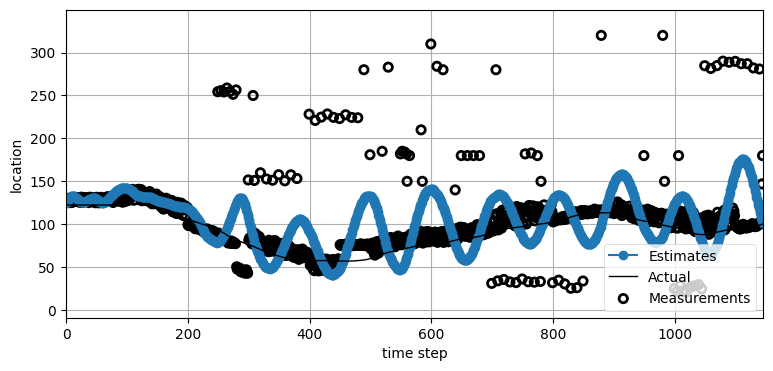

In [28]:
gh.plot_gh_results_manual2(weights, estimates, predictions, actual)

In [29]:
# Intial Hypothesis made by some pre-processing of the measurement data
weight = 150  # initial position
gain_rate = 1.0  # initial gain

# weight, gain_rate = initialize(weights) # initializing the filter output

In [30]:
estimates, predictions = gh_filter_developed(weights, weight, gain_rate, weight_scale1, weight_scale2,
                                   gain_scale1, gain_scale2, do_print=False)

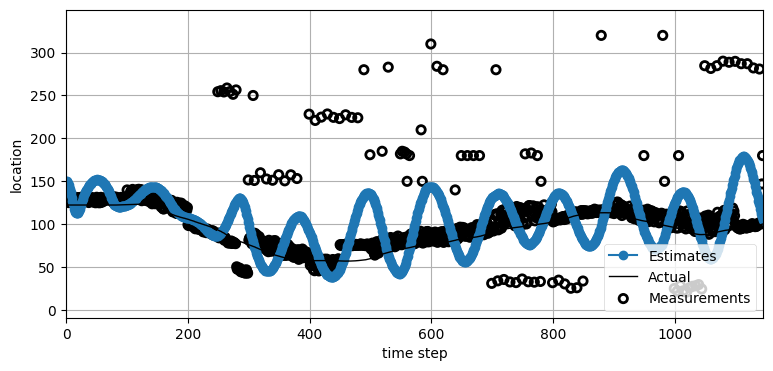

In [31]:
gh.plot_gh_results_manual2(weights, estimates, predictions, actual)

In [32]:
# Time Step on which data is being measured with respect to the the time step on which initial
# gain is being assumed.
time_step = 1.0  # day

# The estimated value is kept something in between the predicted value and the measured value.
# scale = 0.5 means equal likelihood to both measurement and prediction.
# scale > 0.5 means measurement is given more likelihood of being true.
# scale < 0.5 means prediction is given more likelihood of being true.
weight_scale1 = 4.0/100
weight_scale2 = 4.0/10000

# The gain value is updated to something in between the initial value and the new value indicated by the
# next measurement and previous estimates.
# scale = 0.5 means equal likelihood to both new indicated value and initial value.
# scale > 0.5 means new indicated value is given more likelihood of being true.
# scale < 0.5 means initial value is given more likelihood of being true.
gain_scale1 = 1.0/30
gain_scale2 = 1.0/3000

In [33]:
# Intial Hypothesis made by some pre-processing of the measurement data
weight = 125  # initial position
gain_rate = 1.0  # initial gain

# weight, gain_rate = initialize(weights) # initializing the filter output

In [34]:
estimates, predictions = gh_filter_developed(weights, weight, gain_rate, weight_scale1, weight_scale2,
                                   gain_scale1, gain_scale2, do_print=False)

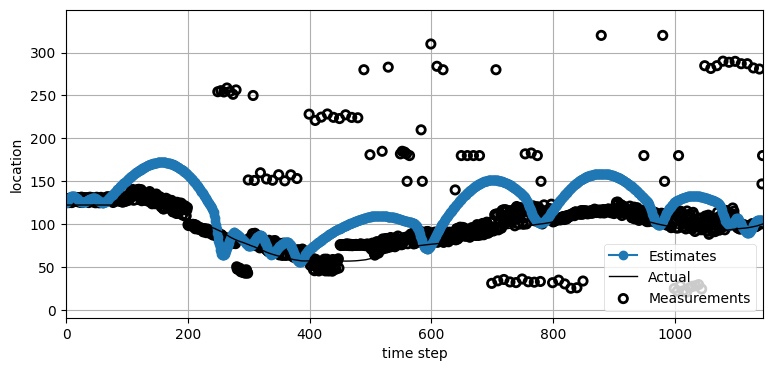

In [35]:
gh.plot_gh_results_manual2(weights, estimates, predictions, actual)

In [36]:
# Intial Hypothesis made by some pre-processing of the measurement data
weight = 150  # initial position
gain_rate = 1.0  # initial gain

# weight, gain_rate = initialize(weights) # initializing the filter output

In [37]:
estimates, predictions = gh_filter_developed(weights, weight, gain_rate, weight_scale1, weight_scale2,
                                   gain_scale1, gain_scale2, do_print=False)

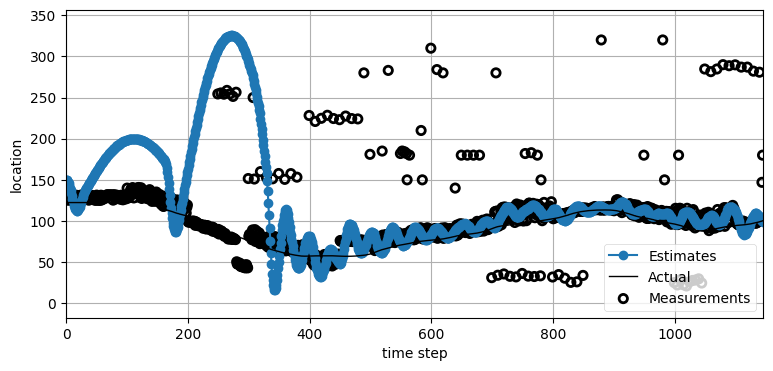

In [38]:
gh.plot_gh_results_manual2(weights, estimates, predictions, actual)

## Idea - 2 Global Outlier Detection

In [39]:
def outlier_listmake(weights):
    mean = 0
    n = len(weights)
    sd = 0
    for z in weights:
        mean = mean + z
    mean = mean / n
    for z in weights:
        sd = sd + (z-mean)*(z-mean)
    sd = sd / n
    sd = math.sqrt(sd)
    outliers = []
    for i in range(n):
        z = weights[i]
        if z < mean - 3*sd:
            outliers.append(i)
        elif z > mean + 3*sd:
            outliers.append(i)
    return outliers

In [40]:
outliers = outlier_listmake(weights)

In [41]:
# Intial Hypothesis made by some pre-processing of the measurement data
weight = 125  # initial position
gain_rate = 1.0  # initial gain

# weight, gain_rate = initialize(weights) # initializing the filter output

In [42]:
# Time Step on which data is being measured with respect to the the time step on which initial
# gain is being assumed.
time_step = 1.0  # day

# The estimated value is kept something in between the predicted value and the measured value.
# scale = 0.5 means equal likelihood to both measurement and prediction.
# scale > 0.5 means measurement is given more likelihood of being true.
# scale < 0.5 means prediction is given more likelihood of being true.
weight_scale1 = 4.0/100
weight_scale2 = 4.0/1000

# The gain value is updated to something in between the initial value and the new value indicated by the
# next measurement and previous estimates.
# scale = 0.5 means equal likelihood to both new indicated value and initial value.
# scale > 0.5 means new indicated value is given more likelihood of being true.
# scale < 0.5 means initial value is given more likelihood of being true.
gain_scale1 = 1.0/30
gain_scale2 = 1.0/300

In [43]:
def gh_filter_developed2(weights, outliers, weight, gain_rate, weight_scale1, weight_scale2, 
                         gain_scale1, gain_scale2, do_print=False):
    estimates, predictions = [weight], []
    ctr = 0
    
    for (i, z) in enumerate(weights):
        # prediction step
        weight = weight + gain_rate * time_step
        predictions.append(weight)
        predicted_weight = weight

        # update step
        residual = z - weight
        if i != outliers[ctr]:
            gain_rate = gain_rate + gain_scale1 * (residual/time_step)
            weight = weight + weight_scale1 * residual
        else:
            gain_rate = gain_rate + gain_scale2 * (residual/time_step)
            weight = weight + weight_scale2 * residual
            ctr = ctr + 1
        estimates.append(weight)
        estimated_weight = weight
        
        # Optional Printing Step
        if do_print:
            gh.print_results(estimates, predicted_weight, estimated_weight)
    
    return [estimates, predictions]

In [44]:
estimates, predictions = gh_filter_developed(weights, weight, gain_rate, weight_scale1, weight_scale2,
                                   gain_scale1, gain_scale2, do_print=False)

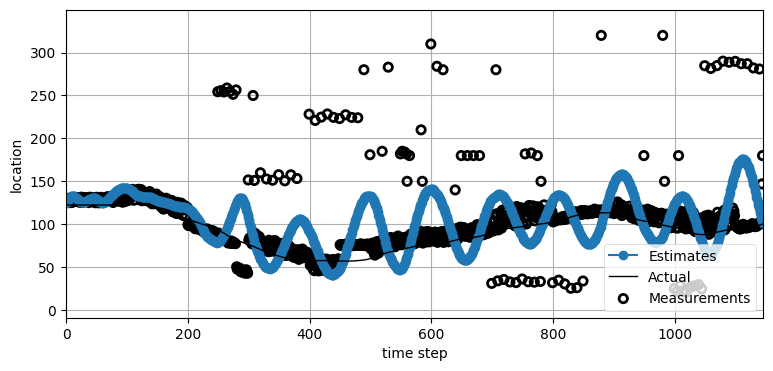

In [45]:
gh.plot_gh_results_manual2(weights, estimates, predictions, actual)

In [46]:
# Intial Hypothesis made by some pre-processing of the measurement data
weight = 150  # initial position
gain_rate = 1.0  # initial gain

# weight, gain_rate = initialize(weights) # initializing the filter output

In [47]:
estimates, predictions = gh_filter_developed(weights, weight, gain_rate, weight_scale1, weight_scale2,
                                   gain_scale1, gain_scale2, do_print=False)

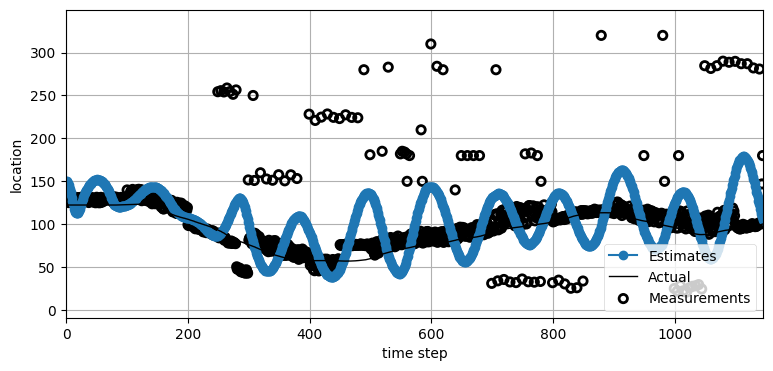

In [48]:
gh.plot_gh_results_manual2(weights, estimates, predictions, actual)

In [49]:
# Time Step on which data is being measured with respect to the the time step on which initial
# gain is being assumed.
time_step = 1.0  # day

# The estimated value is kept something in between the predicted value and the measured value.
# scale = 0.5 means equal likelihood to both measurement and prediction.
# scale > 0.5 means measurement is given more likelihood of being true.
# scale < 0.5 means prediction is given more likelihood of being true.
weight_scale1 = 4.0/100
weight_scale2 = 0

# The gain value is updated to something in between the initial value and the new value indicated by the
# next measurement and previous estimates.
# scale = 0.5 means equal likelihood to both new indicated value and initial value.
# scale > 0.5 means new indicated value is given more likelihood of being true.
# scale < 0.5 means initial value is given more likelihood of being true.
gain_scale1 = 1.0/30
gain_scale2 = 0

In [50]:
# Intial Hypothesis made by some pre-processing of the measurement data
weight = 125  # initial position
gain_rate = 1.0  # initial gain

# weight, gain_rate = initialize(weights) # initializing the filter output

In [51]:
estimates, predictions = gh_filter_developed(weights, weight, gain_rate, weight_scale1, weight_scale2,
                                   gain_scale1, gain_scale2, do_print=False)

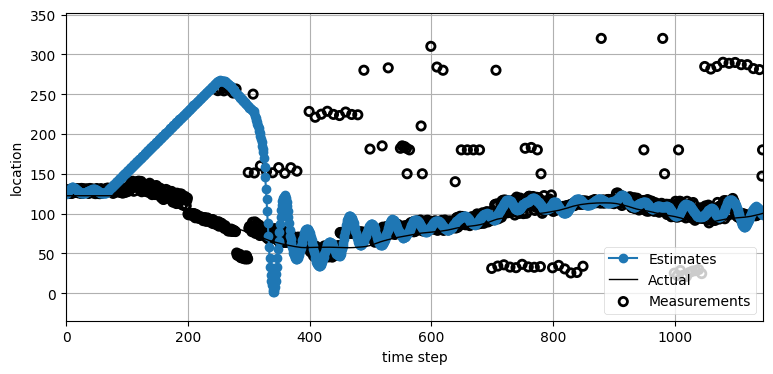

In [52]:
gh.plot_gh_results_manual2(weights, estimates, predictions, actual)

In [53]:
# Intial Hypothesis made by some pre-processing of the measurement data
weight = 150  # initial position
gain_rate = 1.0  # initial gain

# weight, gain_rate = initialize(weights) # initializing the filter output

In [54]:
estimates, predictions = gh_filter_developed(weights, weight, gain_rate, weight_scale1, weight_scale2,
                                   gain_scale1, gain_scale2, do_print=False)

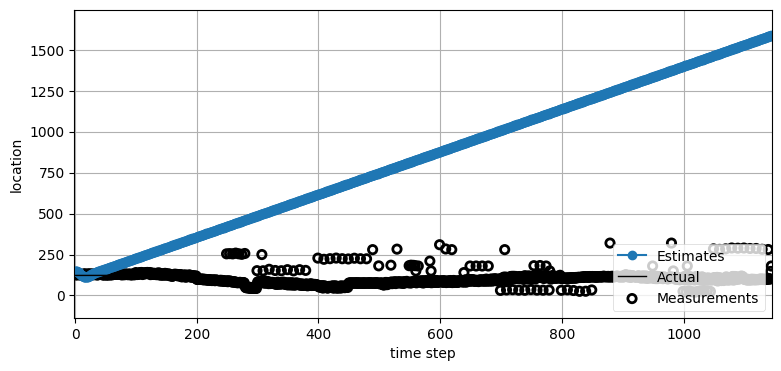

In [55]:
gh.plot_gh_results_manual2(weights, estimates, predictions, actual)